# 100575020
# Data Mining and Foundations of AI

# Introduction
Diabetes is a chronic disease that occurs when a persons blood sugar levels are to high. Diabetes is a pretty common disease. In the United States, it is estimated that 11% of the population,so 37 million people, suffer from diabetes.(https://my.clevelandclinic.org/health/diseases/7104-diabetes)

In this EDA, I will use a dataset on diabetes to try and find patterns and see what common denominators affect someone having diabetes.

The data set I have selected is the Healthcare-Diabetes dataset. This dataset features information about various different health attributes in order to help identify the risk of diabetes. These are the columns of the dataset:
* **Id** - Unique identifier of each data entry
* **Pregnancies** - The number of times subject was pregnant
* **Glucose** - Concentration of plasma glucose over 2 hours. (Done via oral glucose test)
* **BloodPressure** - Diastolic blood pressure in mm Hg
* **SkinThickness** - The thickness of the tricep skinfold in mm
* **Insulin** - Serum insulin over 2 hours in mu U/ml
* **BMI** - (Body Mass Index) calculated with kg for weight and m^2 for height
* **DiabetesPedigreeFunction** - genetic score of diabetes
* **Age** - In years
* **Outcome** - a binary value that shows the presence of diabetes as 1 and the absence of diabetes as 0


The csv file im using is called Healthcare-Diabetes.csv and is located in input/healthcare/Healthcare-Diabetes.csv

In [1]:
# These are the libraries that will be used
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Data pre proccesing

I will start of by viewing some information about the dataset and taking a peek at some of its columns.

In [2]:
data = pd.read_csv('/kaggle/input/healthcare/Healthcare-Diabetes.csv')
data.head(20)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


After looking at the entries of the dataset, the first thing that I have decided to do is to delete the Id column completely. It is not really relevant to the rest of the data and will interfere with various graphs later and possibly skew the values. The index of the columns pretty much acts as the ID value anyway.

In [3]:
# Delete the ID column
data = data.drop('Id',axis=1)
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Looking at the dataset further, i notice that the SkinThickness values are 0 in a lot of the entries. This should not be possible as a skin thickness of 0 would mean that the person does not have any skin at all and is a skeleton. To fix this i will simply fill all the 0 values of this column with the mean average of all the other subjects skin thickness. This will make the dataset much more accurate when calculating averages, as a value of 0, which should not be possible, could really skew the values to be wrong.

In [22]:
# I cast the value to an int as all of the values in the dataset originaly are integers and i dont want to replace them to floats
meanThickness =int(data['SkinThickness'].mean())
print(f"Mean skin thickness:{meanThickness}")
# Replace all 0 values in the skinThickness column with the meanThickness value
data['SkinThickness'] = data['SkinThickness'].replace(0, meanThickness)
data['SkinThickness'] = data['SkinThickness'].astype(int)
data.head(20)

Mean skin thickness:20


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,20,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,20,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,20,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,20,0,0.0,0.232,54,1


Similary, it should not be possible for someone to have a blood pressure of 0, so i will replace that with the mean average aswell

In [23]:
meanBloodPressure = int(data['BloodPressure'].mean())
print(f"Mean blood pressure:{meanBloodPressure}")
data['BloodPressure'] = data['BloodPressure'].replace(0,meanBloodPressure)
data.head(20)

Mean blood pressure:69


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,20,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,20,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,20,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,20,0,0.0,0.232,54,1


Finally, I will do the same with the Insulin value and the BMI value

In [28]:
meanInsulin = int(data['Insulin'].mean())
print(f"Mean insulin:{meanInsulin}")
data['Insulin'] = data['Insulin'].replace(0,meanInsulin)
data.head(20)

meanBMI = round(data['BMI'].mean(),1) # Round to 1 value after the decimal to be consistent with the dataset
print(f"Mean BMI:{meanBMI}")
data['BMI'] = data['BMI'].replace(0,meanBMI)
data.head(20)

Mean insulin:80
Mean BMI:32.1


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,80,33.6,0.627,50,1
1,2,1,85,66,29,80,26.6,0.351,31,0
2,3,8,183,64,0,80,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,80,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,80,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,80,32.1,0.232,54,1


# Exploratory Data Analysis



I will now perform some Exploratory Data Analysis using various graphs in order to detect some patterns in the dataset.

# Histogram- Distribution of diabetes

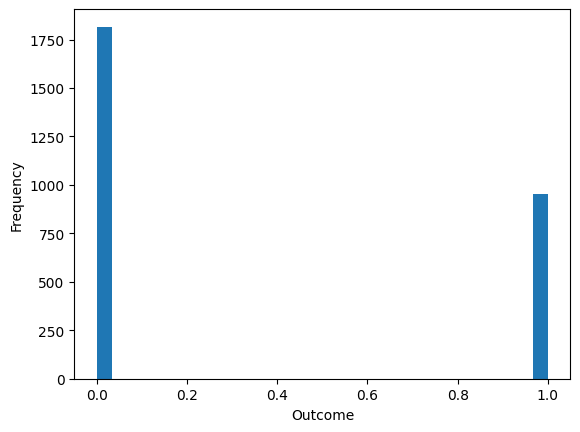

In [34]:
plt.hist(data['Outcome'],bins=30)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

# Histogram conclussion
Looking at the line graph, we can clearly see that in this dataset there are more entries where the outcome of diabetes is absent (0)rather then present (1). It seems like almost two times as much people in this dataset did not have diabetes than those who did.

# Scatter plot - Diabetes Pedigree Function by age

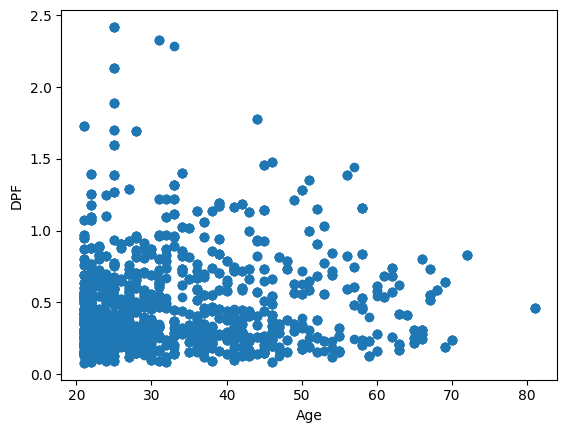

In [22]:
plt.scatter(data["Age"], data["DiabetesPedigreeFunction"])
plt.xlabel("Age")
plt.ylabel("DPF")
plt.show()

In [66]:
corr = pearsonr(data['Age'],data['DiabetesPedigreeFunction']) # Get pearsons correlation
print("Pearsons correlation:%.3f" % corr.statistic) # %.3f to print 3 numbers after decimal

corr = spearmanr(data['Age'],data['DiabetesPedigreeFunction']) # Get spearmans correlation
print("Spearmans correlation:%.3f" % corr.statistic)

Pearsons correlation:0.029
Spearmans correlation:0.039


# Scatter plot conclussion

From this scatter plot we can see that the highest DPF value is in the age ranges from 25-35. This could mean, that genetically, diabetes can affect people from this age group more then other age groups.

However, from the correlations we can see that there is a weak positive correlation between the age and DPF variables. Pearsons correlation indicated that the correlation is linear while Spearmans correlation indicates that the correlation is monotonic.

# Heat map

<Axes: >

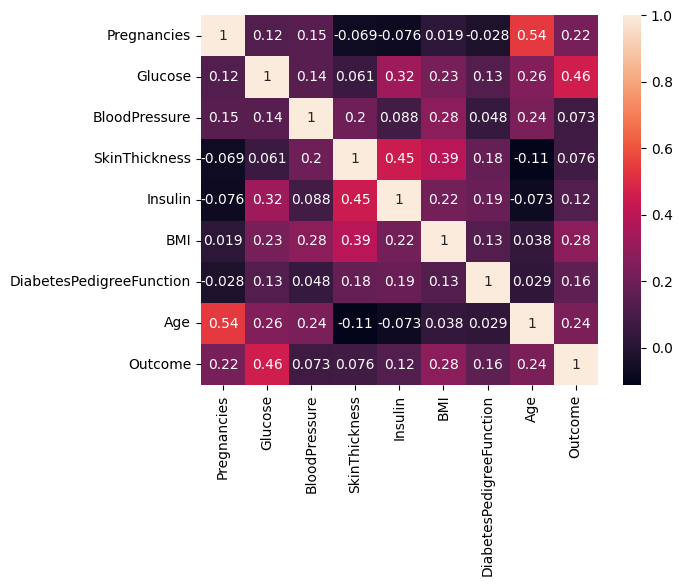

In [9]:
# Create heatmap and enable annotations to see numerical value
sns.heatmap(data.corr(),annot=True)

Looking at this heat map, we can see that there are some relationships between some values. Pregnancies seem to have a relationship with age, Glucose with Insulin and Outcome seems the closest linked to Glucose. We can also see some negative values, with for the DPF being negative with pregnancies.

# Scatter plot - Outcome and BMI

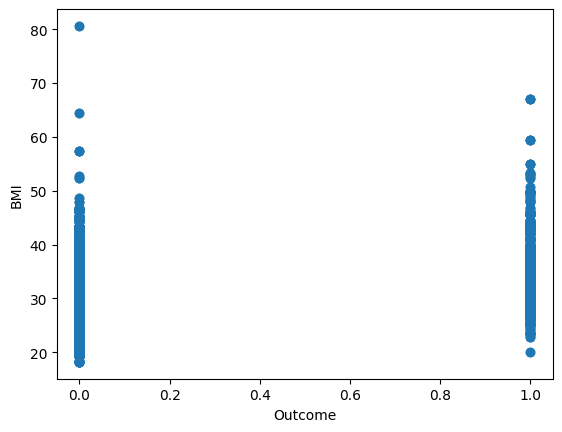

In [35]:
plt.scatter(data["Outcome"], data["BMI"])
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

In [6]:
corr = pearsonr(data['Outcome'],data['BMI']) # Get pearsons correlation
print("Pearsons correlation:%.3f" % corr.statistic) # %.3f to print 3 numbers after decimal

corr = spearmanr(data['Outcome'],data['BMI']) # Get spearmans correlation
print("Spearmans correlation:%.3f" % corr.statistic)

Pearsons correlation:0.281
Spearmans correlation:0.303


In this scatter plot we can see that the highest BMI value of 80 actually ended up not having diabetes. This was surprising, because having a high BMI is linked closely to having diabetes (https://assets.publishing.service.gov.uk/media/5a7f069140f0b6230268d059/Adult_obesity_and_type_2_diabetes_.pdf). The fact that this entry did not have diabetes, shows however, that even something that is closely linked to diabetes, doesnt necessarly mean its 100% the cause of it alone and that multiple different variables are responsible instead.

The Pearson and Spearman correlation confirm this as they are very weak.

# Regression and Classification Analysis


I will now do some Regression analysis via different methods. The target outcome that I want to predict is the Outcome of diabetes.


# Decision Tree

In [24]:
# First drop the outcome collumn from the dataset to not -
# use it in calculations
x = data.drop(['Outcome'],axis=1) 
y = data['Outcome']
# Split data into training/testing 20% for testing -
# 80% for training
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)
# Create and fit decision tree
dTree = DecisionTreeClassifier()
dTree.fit(xTrain,yTrain)
# Predict the tree and create a classification report of it
prediction = dTree.predict(xTest)
print(classification_report(yTest,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



# Decision Tree conclussion

The precision value is the ratio of correctly predicted positive observations to the total predicted positives. For both values 0 and 1 this ratio is 0.98.

The recall value is the ratio of correctly predicted positive observations to all of the observations. Here value 0 is 0.99 and value 1 is 0.96.

The F1-Score is an average of precision and recall used to provide a balance between the two values. For value 0 its 0.99 and for value 1 its 0.97.

The support value tells the number of occurences of each class in the dataset. value 0 appeared 367 times and value 1 187 times.

The values being so high means that the model has very high accuracy and is distinguishing the two outcomes of diabetes well.

# Random Forest Tree

In [28]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(xTrain,yTrain)
prediction = rfc.predict(xTest)
print(classification_report(yTest,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



# Random Forest Tree conclussion
Looking at the results of the RFT prediction we can see that they are exactly the same as the decision tree earlier. A random forest tree uses multiple decision trees and then merges their predictions. Considering the values are the same, this shows that the data was not very complex and 1 decision tree was enough to get an accurate model.

# K nearest neighbors

In [22]:
# Create scaler
scaler = StandardScaler()
# Fit dataset without Outcome (as its the target) into the scaler
scaler.fit(data.drop('Outcome', axis=1))
# Transform data to scaled version
scaled_features = scaler.transform(data.drop('Outcome',axis=1))
# Create train test data sets
xTrain, xTest, yTrain, yTest = train_test_split(scaled_features,data['Outcome'],
                                                    test_size=0.30)

# Create knn classifier with the K value being 1
knn = KNeighborsClassifier(n_neighbors =1)
# Fit the model and print classification report
knn.fit(xTrain,yTrain)
prediction = knn.predict(xTest)
print(classification_report(yTest,prediction))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       536
           1       0.86      0.80      0.83       295

    accuracy                           0.88       831
   macro avg       0.88      0.87      0.87       831
weighted avg       0.88      0.88      0.88       831



As seen in the classification report, the values are all lower then the decision and forest trees. In this code i used the n_neighbors K value to be 1. Im going to try multiple values to see if i can improve the results.

Text(0, 0.5, 'Error Rate')

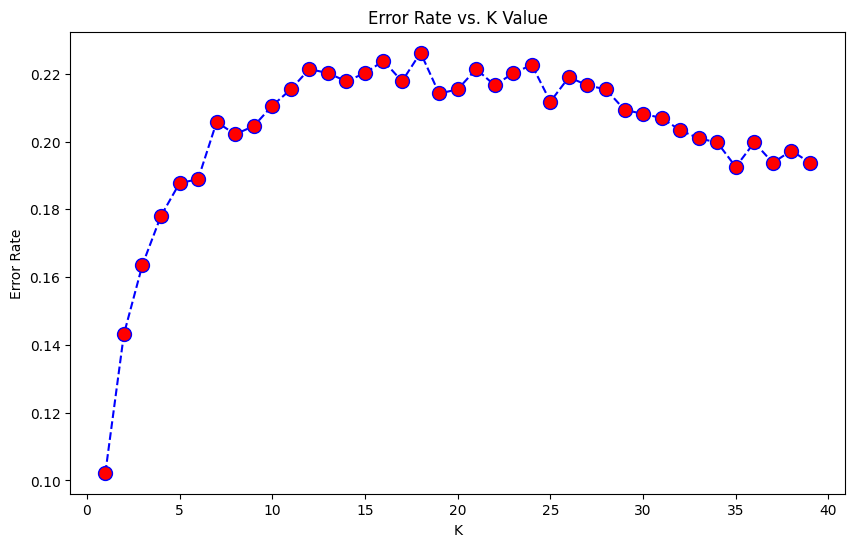

In [14]:
# Keep count of errors
error_rate = []

# Create models with 40 different K values
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain,yTrain)
    pred_i = knn.predict(xTest)
    error_rate.append(np.mean(pred_i != yTest))

# Plot the K and the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From this plot i can see that the lowest error rate occured when K is 1. Because of this, it is unlikely for me to get better classification report values.

# Conclusion

In conclusion, during the EDA process we found out that majority of people in this dataset did not have diabetes. We also found out that the age group with the highest genetic chance of having diabetes ended up being in the 25-35 age range. The heat map showed some relationships between the values in the dataset and we also found out that BMI does not necessarly correlate with diabetes as the highest BMI value in this dataset had an outcome of 0.